In [35]:
# importing libraries  
import numpy as np  
import matplotlib.pyplot as mtp  
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import tensorflow as tf

to_categorical = tf.keras.utils.to_categorical
load_model = tf.keras.models.load_model
  
#importing datasets  
dataset= pd.read_csv('train_data4.csv') 
dataset.to_numpy()
  
#Extracting Independent and dependent Variable  
# Putting feature variable to X
#X = dataset.iloc[:, :11].values
# Putting response variable to y
#y = dataset.iloc[:, -1].values
dataset.info()

# Putting feature variable to X
X = dataset.drop('stage',axis=1)
# Putting response variable to y
y = dataset['stage']

  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resistance_thumb   1224 non-null   float64
 1   bend_thumb         1224 non-null   int64  
 2   resistance_index   1224 non-null   float64
 3   bend_index         1224 non-null   int64  
 4   resistance_mid     1224 non-null   float64
 5   bend_mid           1224 non-null   int64  
 6   resistance_ring    1224 non-null   float64
 7   bend_ring          1224 non-null   int64  
 8   resistance_little  1224 non-null   float64
 9   bend_little        1224 non-null   int64  
 10  x                  1224 non-null   int64  
 11  y                  1224 non-null   int64  
 12  z                  1224 non-null   int64  
 13  stage              1224 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 134.0 KB


In [36]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0) 
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)


(918, 13) (306, 13) (918,) (306,)


In [37]:
#feature Scaling  
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(x_test)    

In [38]:
x_train

array([[ 1.0028591 ,  0.99796488,  0.45444553, ...,  0.48911189,
        -0.95157779,  0.13373901],
       [ 1.27065182,  1.26325167,  0.86517014, ..., -2.10453524,
        -0.02888378,  1.34675213],
       [-0.44768467, -0.44905398,  1.12654026, ..., -1.31008477,
         2.39925834,  0.46925328],
       ...,
       [-0.73779284, -0.73845775, -0.85987261, ..., -1.66057762,
         1.76794139,  0.72734118],
       [-0.67332532, -0.66610681, -0.93174913, ...,  0.55921046,
        -0.51451221, -1.23412685],
       [ 1.95230627,  1.96264412,  1.12654026, ...,  0.41901332,
        -0.95157779,  0.1595478 ]])

In [40]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators= 10, criterion="entropy")  

classifier.fit(x_train,y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [41]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([1, 0, 0, 4, 2, 2, 0, 2, 3, 3, 1, 0, 4, 3, 1, 3, 3, 1, 0, 0, 4, 1,
       1, 3, 0, 3, 3, 3, 2, 3, 3, 3, 1, 1, 1, 0, 3, 0, 3, 3, 0, 1, 3, 1,
       4, 0, 1, 1, 0, 1, 3, 0, 1, 1, 4, 0, 4, 3, 3, 0, 3, 3, 0, 0, 3, 0,
       2, 0, 1, 1, 4, 3, 2, 1, 0, 2, 2, 3, 0, 3, 1, 3, 4, 1, 3, 3, 3, 4,
       3, 1, 2, 1, 3, 2, 1, 1, 2, 2, 3, 1, 1, 0, 1, 0, 1, 0, 0, 2, 3, 1,
       1, 3, 0, 3, 2, 2, 1, 1, 1, 3, 1, 0, 3, 3, 1, 3, 1, 3, 1, 0, 2, 2,
       3, 1, 3, 3, 1, 0, 1, 3, 4, 0, 3, 4, 2, 2, 3, 0, 0, 0, 3, 1, 4, 1,
       3, 3, 3, 3, 1, 0, 2, 4, 3, 1, 3, 3, 3, 1, 0, 5, 1, 1, 1, 3, 1, 3,
       3, 3, 0, 2, 0, 4, 3, 1, 3, 0, 3, 1, 3, 1, 3, 2, 3, 3, 1, 3, 4, 3,
       3, 3, 1, 3, 3, 2, 1, 4, 4, 3, 0, 3, 3, 3, 1, 0, 2, 3, 0, 1, 1, 2,
       1, 3, 3, 1, 0, 0, 1, 4, 1, 5, 1, 2, 3, 0, 3, 0, 3, 1, 2, 2, 0, 3,
       3, 1, 3, 4, 2, 2, 0, 3, 0, 1, 3, 4, 3, 3, 3, 1, 3, 2, 3, 1, 3, 2,
       2, 4, 0, 3, 4, 3, 0, 1, 1, 3, 3, 0, 3, 2, 2, 1, 3, 3, 3, 1, 1, 4,
       0, 1, 1, 0, 1, 2, 1, 1, 1, 3, 0, 3, 0, 0, 0,

In [78]:
%%time
classifier.fit(x_train, y_train)

CPU times: total: 31.2 ms
Wall time: 88.2 ms


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [9]:
print("Accuracy = ",accuracy_score(y_test, y_pred))

#https://www.javatpoint.com/machine-learning-random-forest-algorithm

Accuracy =  0.9117647058823529


In [10]:
 for i in range(10):
    #Fitting Decision Tree classifier to the training set  
    from sklearn.ensemble import RandomForestClassifier  
    classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  

    classifier.fit(x_train, y_train)
    
    #Predicting the test set result  
    y_pred= classifier.predict(x_test)  
    y_pred
    
    #test predict
    classifier.predict([[27400, 84, 19087, 90, 12500.04, 90, 22000, 100,22000, 89, 68,29,-155]])
    
    print("Accuracy = ",accuracy_score(y_test, y_pred))
    print('MAE: %.3f' % mae(y_test, y_pred))

Accuracy =  0.9183006535947712
MAE: 0.092
Accuracy =  0.9313725490196079
MAE: 0.072
Accuracy =  0.9313725490196079
MAE: 0.072
Accuracy =  0.9183006535947712
MAE: 0.088
Accuracy =  0.9084967320261438
MAE: 0.098
Accuracy =  0.9313725490196079
MAE: 0.069
Accuracy =  0.9084967320261438
MAE: 0.101
Accuracy =  0.9084967320261438
MAE: 0.101
Accuracy =  0.9117647058823529
MAE: 0.098
Accuracy =  0.9183006535947712
MAE: 0.095


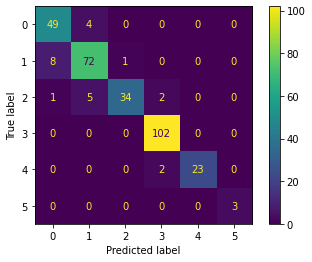

In [10]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()


In [83]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10, 25, 30, 50, 100, 200]
}
#model.predict([[27400, 84, 19087, 90, 12500.04, 90, 22000, 100, 68,29,-155]])

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [84]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 2.94 s
Wall time: 53.1 s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [85]:
grid_search.best_score_

0.8954385798367192

In [86]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       n_estimators=200)

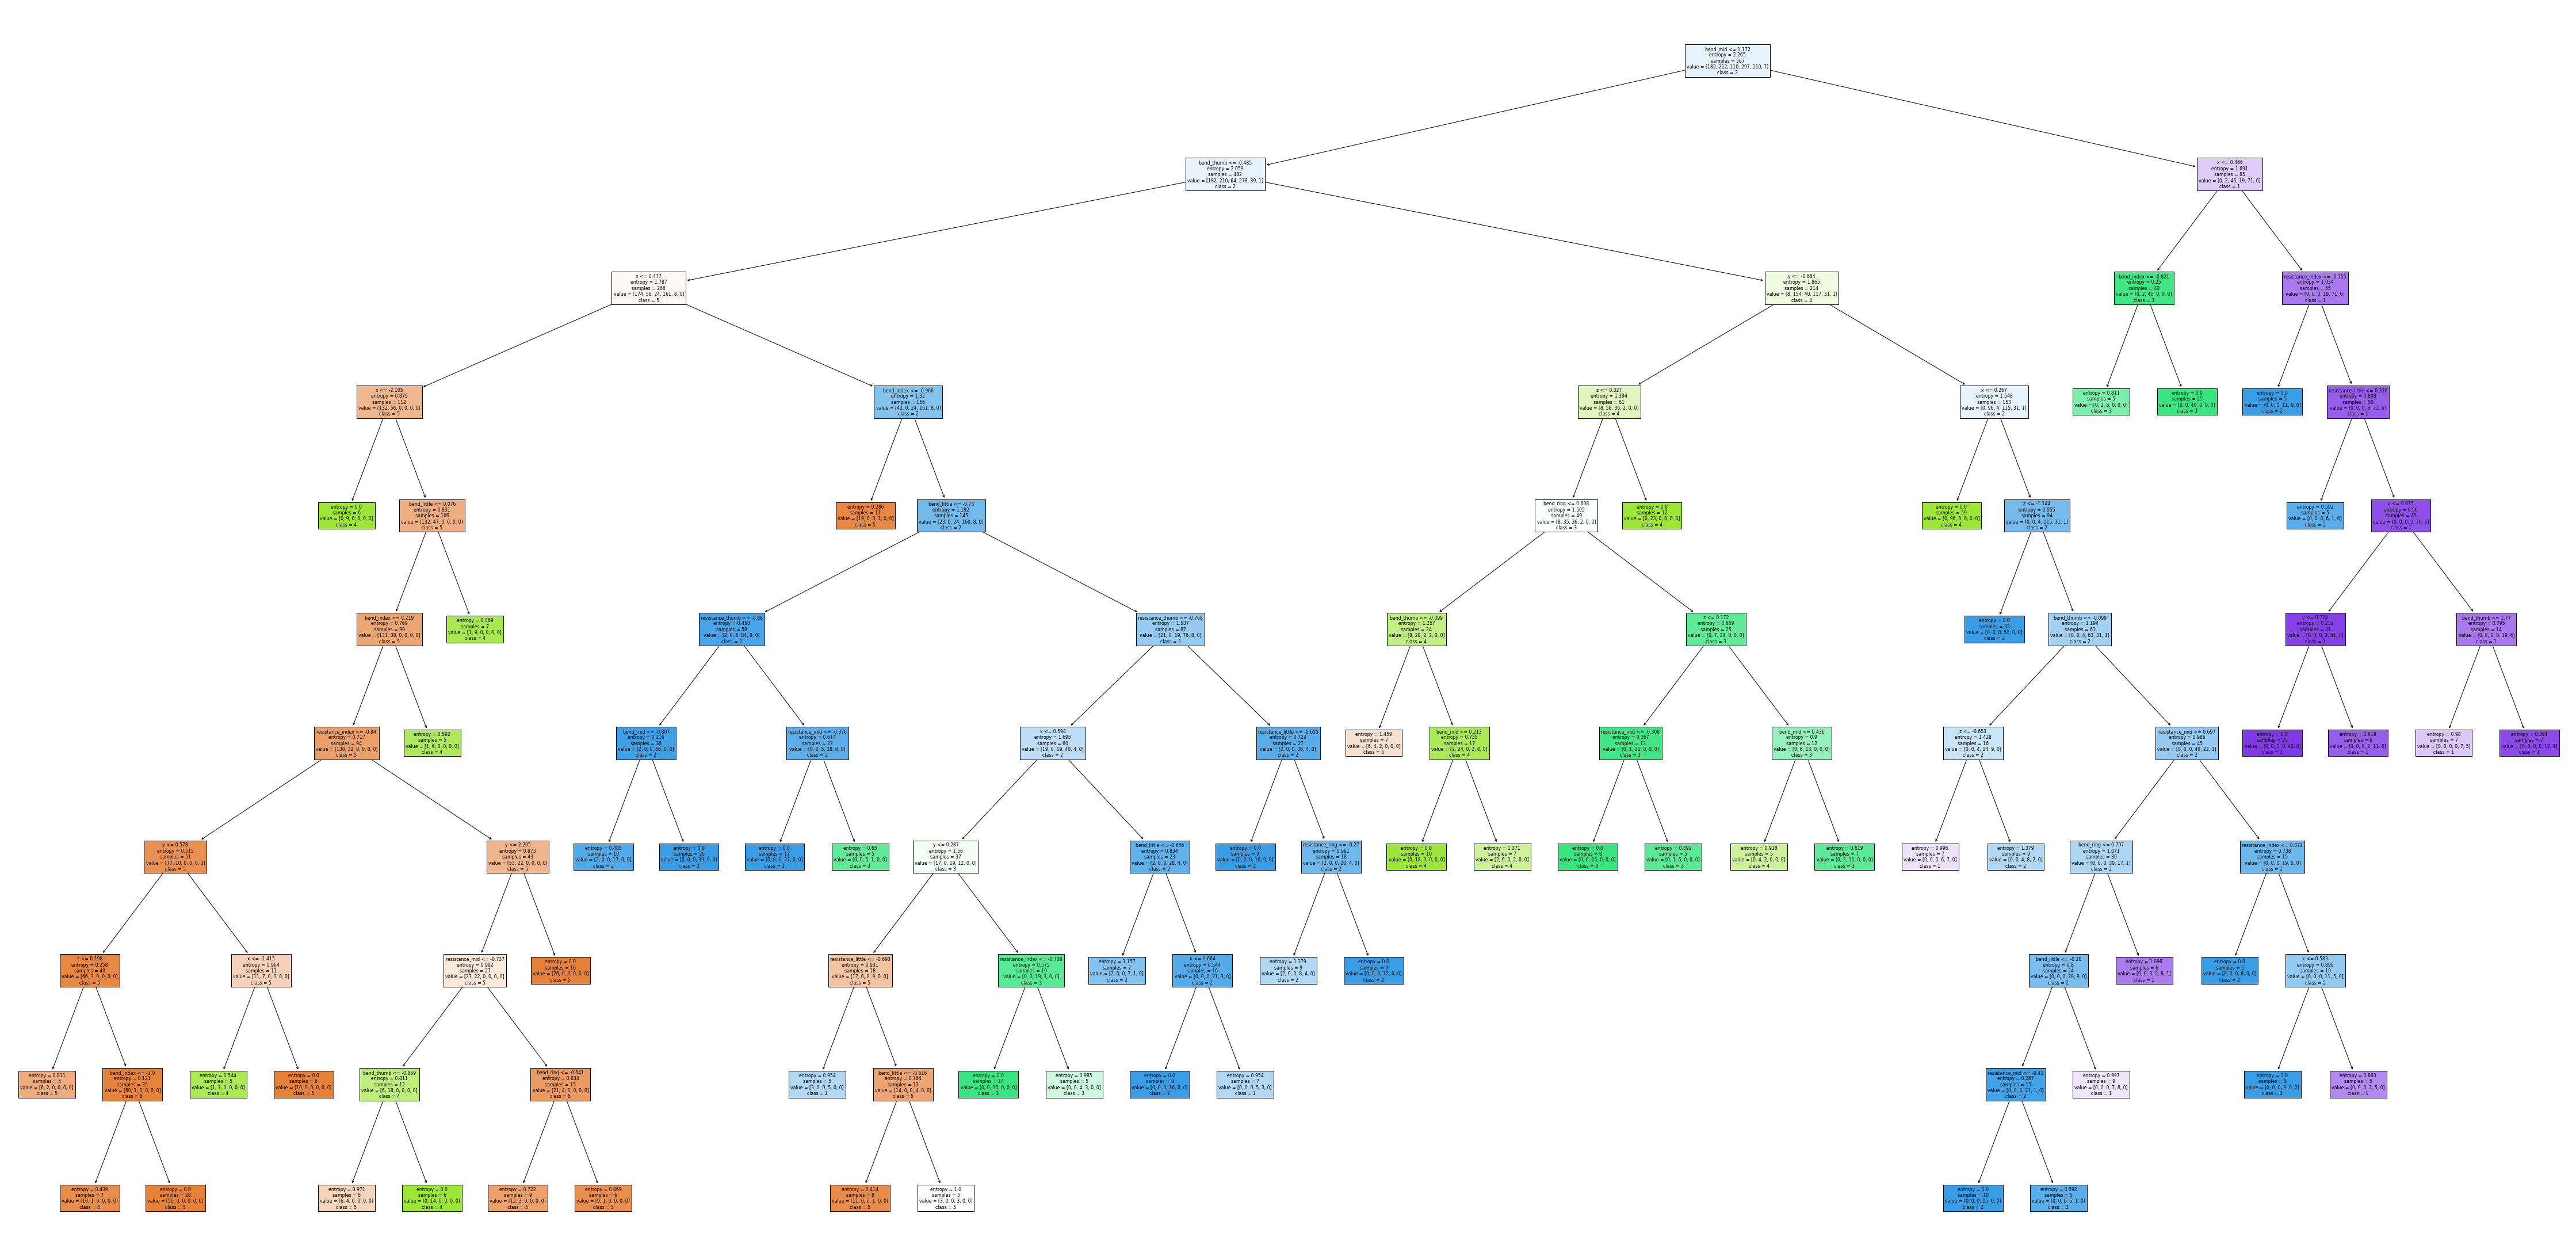

In [87]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['5', '4', '3', '2', '1', '0'],filled=True);

In [43]:
import joblib
# save
joblib.dump(classifier, "model.h5")


['model.h5']

In [53]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("model.h5")

get_data = np.array(
    [[10923, 5, 10560, 3, 37180, 163, 11726.79, 10, 16549.5, 39, 64, 49, -120]])

get_data = st_x.transform(get_data)
get_data.reshape(-1, 1)


C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.85383698, -0.85904266, -0.8969703 , -0.89797985,  1.65842941,
         1.66254478, -0.61553064, -0.61746421, -0.32216015, -0.32060115,
         0.53584427,  0.16536759, -0.22758405]])

In [54]:
get_data.reshape(-1,1)

array([[-0.85383698],
       [-0.85904266],
       [-0.8969703 ],
       [-0.89797985],
       [ 1.65842941],
       [ 1.66254478],
       [-0.61553064],
       [-0.61746421],
       [-0.32216015],
       [-0.32060115],
       [ 0.53584427],
       [ 0.16536759],
       [-0.22758405]])

In [55]:
result = loaded_rf.predict(get_data)
result

array([3], dtype=int64)

In [103]:
# save
joblib.dump(classifier, "./random_forest.joblib")


['./random_forest.joblib']

In [56]:
import joblib


classifier = joblib.load('model.h5')
print("Enter the following details to make the predictions:- n")


resistance_thumb = float(input("Enter resistance_thumb:- "))
bend_thumb = int(input("Enter bend_thumb:- "))
resistance_index = float(input("Enter resistance_index:- "))
bend_index = int(input("Enter bend_index:- "))
resistance_mid = float(input("Enter resistance_mid:- "))
bend_mid = int(input("Enter bend_mid:- "))
resistance_ring = float(input("Enter resistance_ring:- "))
bend_ring = int(input("Enter bend_ring:- "))
resistance_little = float(input("Enter resistance_little:- "))
bend_little = int(input("Enter bend_little:- "))
x = int(input("Enter X :- "))
y = int(input("Enter Y :- "))
z = int(input("Enter Z :- "))

get_data = np.array([[resistance_thumb, bend_thumb, resistance_index,
                                  bend_index, resistance_mid, bend_mid,
                                  resistance_ring, bend_ring,
                                  resistance_little, bend_little,
                                  x, y, z]])

get_data = st_x.transform(get_data)
get_data.reshape(-1, 1)


model_pred = classifier.predict(get_data)

model_pred


Enter the following details to make the predictions:- n


C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

In [58]:
if model_pred == 0:
    print("Stage 0")
elif model_pred == 1:
    print("Stage 1")
elif model_pred == 2:
    print("Stage 2")
elif model_pred == 3:
    print("Stage 3")
elif model_pred == 4:
    print("Stage 4")
elif model_pred == 5:
    print("Stage 5")

Stage 4
